# 多层操作

总算是能来点高端点的东西了，这小节将会使用到卷积神经网络。首先我们还是先加载相关的库，开启一个会话。

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from tensorflow.python.framework import ops
ops.reset_default_graph()

sess = tf.Session()

## 卷积层操作

这里我们构建一个卷积网络+普通网络的一个结构。

其中涉及到的权重都设置为固定值，不用学习。

来练习构建整个网络，并feed数据输出结果。

最后将整个graph保存到tensorboard中。

[[[[0.72392015 0.72744314 0.4045931 ]
   [0.44091657 0.14427324 0.66309457]
   [0.70344593 0.34776271 0.71087831]
   [0.06760684 0.24347543 0.30133326]]

  [[0.43634679 0.03120201 0.52097436]
   [0.59101304 0.53549256 0.48331427]
   [0.78864992 0.26940446 0.32615327]
   [0.11105093 0.9352927  0.31519688]]

  [[0.3707504  0.14351385 0.36660984]
   [0.01813955 0.36129332 0.28292336]
   [0.41976884 0.94289141 0.30738687]
   [0.90596038 0.64111324 0.98093417]]

  [[0.04103797 0.31873766 0.1801793 ]
   [0.63718267 0.52682978 0.28655754]
   [0.53700243 0.54112715 0.13726853]
   [0.8402482  0.93482228 0.02006843]]]]
[[[0.72392015 0.72744314 0.4045931 ]
  [0.44091657 0.14427324 0.66309457]
  [0.70344593 0.34776271 0.71087831]
  [0.06760684 0.24347543 0.30133326]]

 [[0.43634679 0.03120201 0.52097436]
  [0.59101304 0.53549256 0.48331427]
  [0.78864992 0.26940446 0.32615327]
  [0.11105093 0.9352927  0.31519688]]

 [[0.3707504  0.14351385 0.36660984]
  [0.01813955 0.36129332 0.28292336]
  [0.4197

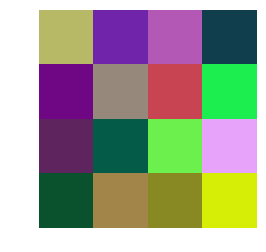

In [18]:
# 创建一个像素为4*4 的随机图片

x_shape = [1,4,4,3] # [图片数量，像素，像素，通道（一般1表示黑白图片，3表示彩色图片，有RGB3通道）]
x_val = np.random.uniform(size=x_shape)
print x_val
print x_val[0]

# 我们显示出来看看
plt.imshow(x_val[0])
plt.axis('off')
plt.show()

In [33]:
# 创建输入到网络的placeholder
# 创建卷积层来对输入图片进行卷积操作
# 创建一个简单的层来进行sigmoid（wx+b）操作

x_input = tf.placeholder(tf.float32,shape=[None,4,4,3]) 
# [样本数量，像素(行数)，像素（列数），通道] None表示事先不知道，先占个位置。feed的时候就自然知道了
my_filter = tf.constant(0.25,shape=[2,2,3,1]) 
# [维度1（行数），维度2（列数），通道数（与输入图片一致），输出的层数]
my_strides = [1,2,2,1] 
# 定义filter如何滑动，[1，可自定义（1表示每次滑动一个像素，2表示每次滑动两个像素），自定义，1]

conv_output = tf.nn.conv2d(x_input, my_filter, my_strides, padding='SAME', name='moving_avg_window') 
# padding表示是否需要给输入周围补0，可选"SAME", "VALID"，“SAME”将会补0.
# 具体见https://www.tensorflow.org/versions/r1.7/api_docs/python/tf/nn/conv2d

def custom_layer(input_matrix):
    input_matrix_sqeezed = tf.squeeze(input_matrix)
    A = tf.constant([[1.,2.],[-1.,3.]])
    b = tf.constant(1., shape=[2,2])
    temp1 = tf.matmul(A, input_matrix_sqeezed)
    temp = tf.add(temp1,b)
    return tf.sigmoid(temp)

with tf.name_scope('Custom_Layer') as scope:
    custom_layer1 = custom_layer(conv_output)

In [34]:
print sess.run(conv_output,feed_dict={x_input: x_val})

[[[[1.425646 ]
   [1.2800627]]

  [[0.8834388]
   [1.802148 ]]]]


In [35]:
print sess.run(custom_layer1, feed_dict={x_input: x_val})

[[0.9851167  0.99722517]
 [0.9024432  0.994097  ]]


In [36]:
merged = tf.summary.merge_all(key='summaries')
if not os.path.exists('tensorboard_logs/'):
    os.makedirs('tensorboard_loags/')
my_writer = tf.summary.FileWriter('tensorboard_logs/',sess.graph)